# **Task 2: Text Sentiment Analysis**
**Description:**

Build a sentiment analysis model using a dataset such as IMDB Reviews.

**Steps:**

**1. Text Preprocessing:**

○ Tokenize text into individual words.

○ Remove stopwords.

○ Perform lemmatization for text normalization.

**2. Feature Engineering:**

○ Convert text data into numerical format using TF-IDF or word embeddings.

**3. Model Training:**

○ Train a classifier such as Logistic Regression or Naive Bayes to predict
sentiment.

**4. Model Evaluation:**

○ Evaluate the model's performance using metrics like precision, recall, and
F1-score.

**Outcome:**

● A working Python script that processes input text, predicts sentiment, and provides
evaluation metrics.

# **Installation**

In [81]:
!pip install kaggle
!pip install nltk scikit-learn

In [82]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "IMDB Dataset.csv"
# Load the dataset directly using kagglehub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lakshmi25npathi/imdb-dataset-of-50k-movie-reviews",
    file_path
)
print("First 5 records:")
print(df.head())

<ipython-input-82-7f65f2b8b403>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [83]:
!pip install -q nltk scikit-learn pandas matplotlib seaborn

# **Import Libraries**

In [84]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Load Dataset**

In [85]:
url='https://raw.githubusercontent.com/SK7here/Movie-Review-Sentiment-Analysis/refs/heads/master/IMDB-Dataset.csv'
data = pd.read_csv(url)
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **1. Text Preprocessing** :

○ Tokenize text into individual words.

○ Remove stopwords.

○ Perform lemmatization for text normalization.

In [86]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [87]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return ' '.join(filtered_words)


df['clean_review'] = df['review'].apply(preprocess)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [88]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


In [89]:

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42
)

# **2.Feature Engineering** :
○ Convert text data into numerical format using TF-IDF or word embeddings.

In [90]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# **3. Model Training** :
○ Train a classifier such as Logistic Regression or Naive Bayes to predict
sentiment.

In [91]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [93]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8884


# **4. Model Evaluation**:
○ Evaluate the model's performance using metrics like precision, recall, and
F1-score.

In [94]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and visualize the confusion matrix.
cm = confusion_matrix(y_test, y_pred)




Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



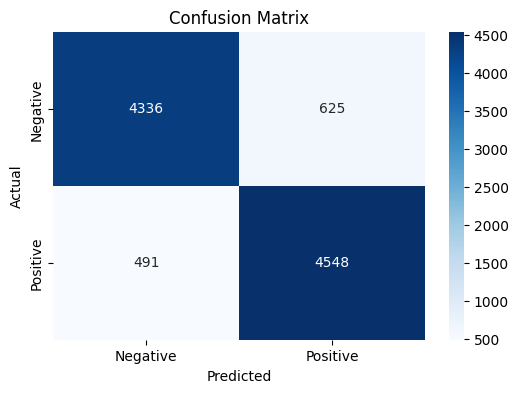

In [95]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


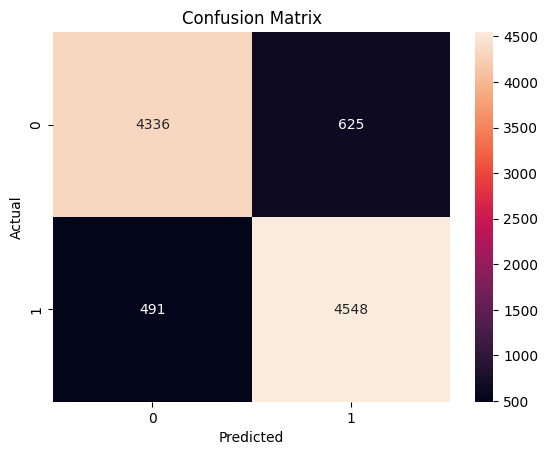

In [96]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
#  predict the sentances
def predict_sentiment(text):
    processed_text = preprocess(text)
    vector = vectorizer.transform([processed_text])
    prediction = model.predict(vector)[0]
    return "Positive" if prediction == 1 else "Negative"

sample_review = "The movie was fantastic and I enjoyed every part of it."
print("\nSample Review Prediction:", predict_sentiment(sample_review))


Sample Review Prediction: Positive


In [98]:
examples = [
    "I really enjoyed this internship.",
    "The movie was boring and too long.",
    "The service was excellent and friendly."
]

print("\nExample Predictions:")
for ex in examples:
    print(f"Text: {ex}\nPredicted Sentiment: {predict_sentiment(ex)}\n")


Example Predictions:
Text: I really enjoyed this internship.
Predicted Sentiment: Positive

Text: The movie was boring and too long.
Predicted Sentiment: Negative

Text: The service was excellent and friendly.
Predicted Sentiment: Positive

